# Projet Big Data : Partie 1

## I] Collecte de données et étiquetage et annotation :

In [1]:
import os
def create_folder():
    if not os.path.exists('images'):
        os.makedirs('images')
    return

create_folder()

In [2]:
#Get our images on wikidata by a request
import sys
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?grandeville ?grandevilleLabel ?pays ?paysLabel ?image {
  ?grandeville wdt:P31 wd:Q1549591;
               wdt:P17 ?pays;
               wdt:P18 ?image.
 SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 100"""

#fonction qui va exécuter notre requête vers wikidata
def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["grandevilleLabel"]["value"],
            result["paysLabel"]["value"],
            result["image"]["value"],
        )
    )

C:\Users\adrie\AppData\Local\Temp\ipykernel_28388\3871241469.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Put in a dataframe the data
dataframe = pd.DataFrame(array, columns=["ville", "pays", "image"])
dataframe = dataframe.astype(
    dtype={"ville": "<U200", "pays": "<U200", "image": "<U200"}
)
dataframe

,ville,pays,image
0,Krasnoïarsk,Russie,http://commons.wikimedia.org/wiki/Special:File...
1,São Paulo,Brésil,http://commons.wikimedia.org/wiki/Special:File...
2,Boston,États-Unis,http://commons.wikimedia.org/wiki/Special:File...
3,Le Caire,Égypte,http://commons.wikimedia.org/wiki/Special:File...
4,Szczecin,Pologne,http://commons.wikimedia.org/wiki/Special:File...
...,...,...,...
95,Padoue,Italie,http://commons.wikimedia.org/wiki/Special:File...
96,Buenos Aires,Argentine,http://commons.wikimedia.org/wiki/Special:File...
97,Lyon,France,http://commons.wikimedia.org/wiki/Special:File...
98,Le Mans,France,http://commons.wikimedia.org/wiki/Special:File...


In [4]:
import os
import re
import requests
from PIL import Image
from io import BytesIO
from urllib.parse import urlparse, unquote


def download_image(url):
    # Check if the URL ends with '.jpg' or '.png'
    if not url.endswith(('.jpg', '.JPG')):
        print('Skipping unsupported image URL:', url)
        return
    
    # Créez un dossier nommé "images" s'il n'existe pas déjà
    if not os.path.exists("images"):
        os.makedirs("images")
    
    # Clean URL
    url = unquote(url)

    # Extract the image name from the URL
    match = re.search(r'/([^/]+)\.(jpg|JPG)$', url)
    if match:
        filename = match.group(1) + '.' + match.group(2)
    else:
        filename = 'image.jpg'

    # Create the output path by combining the output folder and the filename
    output_path = os.path.join("images", filename)
    
    if os.path.exists(output_path):
        print('Image already exists:', output_path)
        return
    
    # Once we verified everything, we can download the image
    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers)
    
    if request.status_code == 200:
        img = Image.open(BytesIO(request.content))
        
        # Get the EXIF data from the original image and save it to the new image
        exif_data = img.getexif()
        if exif_data is not None:
            img.save(output_path, exif=exif_data)
        else:
            img.save(output_path)
        
        return f"Image enregistrée avec succès dans le dossier 'images' : {filename}"
    else:
        return f"Échec de la requête avec le code d'état : {request.status_code}"


In [5]:
# We call the download fonction
dataframe.image.apply(download_image)

Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Volgograd%20Montage%202016.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Oslo%20newer%20montage%202013.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Ljubljana%20Montage%202.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/SA%20Montage%20Nima.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Bern%20luftaufnahme.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Istanbul%20Montage%202016.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Omsk%20Collage%202016.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Stuttgart%20Downtown%20Sights%20Collage.png
Skipping unsupported image URL: http://commons.wikimedia.org/wiki/Special:FilePath/KAZ%20Collag

0     Image enregistrée avec succès dans le dossier ...
1     Image enregistrée avec succès dans le dossier ...
2     Image enregistrée avec succès dans le dossier ...
3     Image enregistrée avec succès dans le dossier ...
4     Image enregistrée avec succès dans le dossier ...
                            ...                        
95    Image enregistrée avec succès dans le dossier ...
96    Image enregistrée avec succès dans le dossier ...
97    Image enregistrée avec succès dans le dossier ...
98    Image enregistrée avec succès dans le dossier ...
99    Image enregistrée avec succès dans le dossier ...
Name: image, Length: 100, dtype: object

In [6]:
from PIL import Image
import os

def redimensionner_images(dossier_images, largeur, hauteur):
    """
    Redimensionne toutes les images dans un dossier donné.

    Args:
    - dossier_images (str): Chemin vers le dossier contenant les images.
    - largeur (int): Largeur cible pour le redimensionnement.
    - hauteur (int): Hauteur cible pour le redimensionnement.
    """
    # Vérifier si le dossier existe
    if not os.path.exists(dossier_images):
        print("Le dossier spécifié n'existe pas.")
        return

    # Liste des extensions d'images supportées
    extensions = ['.jpg', '.jpeg', '.png']

    # Parcourir tous les fichiers dans le dossier
    for fichier in os.listdir(dossier_images):
        # Vérifier si c'est un fichier d'image
        if any(fichier.lower().endswith(ext) for ext in extensions):
            chemin_image = os.path.join(dossier_images, fichier)
            try:
                # Ouvrir l'image
                image = Image.open(chemin_image)
                # Redimensionner l'image
                image_redimensionnee = image.resize((largeur, hauteur), Image.Resampling.LANCZOS)
                # Enregistrer l'image redimensionnée, écrasant l'originale
                image_redimensionnee.save(chemin_image)
                # print(f"Image {fichier} redimensionnée avec succès.")
            except Exception as e:
                print(f"Impossible de redimensionner l'image {fichier}: {e}")

# Utilisation de la fonction
dossier_images = "images"
largeur_cible = 800
hauteur_cible = 600

redimensionner_images(dossier_images, largeur_cible, hauteur_cible)


In [13]:
import os
from PIL import Image, ExifTags
import json
import numpy as np
from sklearn.cluster import KMeans
from skimage import io, color

def extract_image_metadata(image_path):
    image_metadata = {}
    try:
        with Image.open(image_path) as img:
            print(image_path)
            image_metadata['filename'] = img.filename
            image_metadata['size'] = img.size
            image_metadata['format'] = img.format
            image_metadata['mode'] = img.mode
            if 'exif' in img.info:
                exif_data = {ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS and type(v) != bytes}
                image_metadata['exif'] = exif_data


            # Extraire les couleurs prédominantes
            img = color.rgb2lab(io.imread(image_path))
            reshaped = img.reshape(-1, 3)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(reshaped)
            lab_values = kmeans.cluster_centers_.tolist()

            # Convertir les valeurs LAB en RGB
            rgb_values = color.lab2rgb(lab_values)

            # Mettre à l'échelle les valeurs RGB entre 0 et 255
            rgb_values *= 255
            rgb_values = np.round(rgb_values).astype(np.uint8).tolist()

            image_metadata['dominant_colors'] = rgb_values
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
    return image_metadata

def save_metadata_to_json(metadata, output_file):
    with open(output_file, 'w') as json_file:
        json.dump(metadata, json_file, indent=4)

# Chemin vers le dossier contenant les images
images_folder = "images"

# Liste pour stocker les métadonnées de chaque image
images_metadata = []

# Parcourir toutes les images dans le dossier
for filename in os.listdir(images_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filtrer les types de fichiers d'image pris en charge
        image_path = os.path.join(images_folder, filename)
        metadata = extract_image_metadata(image_path)
        if metadata:
            # Ajouter les métadonnées extraites à la liste
            print(metadata)
            images_metadata.append(metadata)
            # Enregistrer les métadonnées dans un fichier JSON avec le même nom que l'image
            output_file = os.path.splitext(image_path)[0] + '.json'
            save_metadata_to_json(metadata, output_file)

# Enregistrer toutes les métadonnées dans un seul fichier JSON
all_metadata_file = "all_images_metadata.json"
save_metadata_to_json(images_metadata, all_metadata_file)

images\00 0781 Canal in Delft (NL).jpg
{'filename': 'images\\00 0781 Canal in Delft (NL).jpg', 'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'dominant_colors': [[64, 63, 45], [102, 128, 170], [152, 144, 118]]}
images\00 6191 Maastricht - Niederlande.jpg
{'filename': 'images\\00 6191 Maastricht - Niederlande.jpg', 'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'dominant_colors': [[160, 162, 161], [56, 47, 41], [110, 93, 76]]}
images\00 sea towers (April 2018).jpg
{'filename': 'images\\00 sea towers (April 2018).jpg', 'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'dominant_colors': [[105, 150, 198], [70, 78, 83], [166, 171, 178]]}
images\01. Panorama de Lyon pris depuis le toit de la Basilique de Fourvière.jpg
{'filename': 'images\\01. Panorama de Lyon pris depuis le toit de la Basilique de Fourvière.jpg', 'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'dominant_colors': [[177, 190, 205], [145, 126, 111], [56, 56, 39]]}
images\138 - Place de la Bourse et le miro

## II] Récupération des métadonnées

In [8]:
import os
#get all images
def get_all_images(source="images"):
    images = []
    for filename in os.listdir(source):
        if filename.endswith(".jpg"):
            images.append(filename)
    return images

In [9]:
# Récupération des couleurs prédominantes 
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
import numpy
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def get_color(image_path):
    imgfile = Image.open(image_path)

    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    n_clusters = 4
    clusters = KMeans(n_clusters, n_init=2)
    clusters.fit(numarray)
    npbins = numpy.arange(0, n_clusters + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)

    # Zip des étiquettes et des hauteurs de barres, puis tri par étiquettes
    sorted_data = sorted(zip(labels, histogram[0]), key=lambda x: x[0])

    # Récupération des étiquettes triées et des hauteurs triées
    sorted_labels, sorted_heights = zip(*sorted_data)

    # Création des histogrammes triés
    barlist = plt.bar(sorted_labels, sorted_heights)
    colors =[]
    # Coloration des histogrammes avec les couleurs des clusters
    for i in range(n_clusters):
        colors.append(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
        barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
        )
    #print(colors)
    return colors


{'00 0781 Canal in Delft (NL).jpg': ['#565c60', '#31321e', '#a4c9f2', '#999484']}
{'00 0781 Canal in Delft (NL).jpg': ['#565c60', '#31321e', '#a4c9f2', '#999484'], '00 6191 Maastricht - Niederlande.jpg': ['#a2a4a4', '#5c4d40', '#332a23', '#827868']}
{'00 0781 Canal in Delft (NL).jpg': ['#565c60', '#31321e', '#a4c9f2', '#999484'], '00 6191 Maastricht - Niederlande.jpg': ['#a2a4a4', '#5c4d40', '#332a23', '#827868'], '00 sea towers (April 2018).jpg': ['#363f44', '#70787b', '#afb4ba', '#6e98c2']}
{'00 0781 Canal in Delft (NL).jpg': ['#565c60', '#31321e', '#a4c9f2', '#999484'], '00 6191 Maastricht - Niederlande.jpg': ['#a2a4a4', '#5c4d40', '#332a23', '#827868'], '00 sea towers (April 2018).jpg': ['#363f44', '#70787b', '#afb4ba', '#6e98c2'], '01. Panorama de Lyon pris depuis le toit de la Basilique de Fourvière.jpg': ['#98a4b5', '#c4ccd3', '#343523', '#806f61']}
{'00 0781 Canal in Delft (NL).jpg': ['#565c60', '#31321e', '#a4c9f2', '#999484'], '00 6191 Maastricht - Niederlande.jpg': ['#a2a4a4

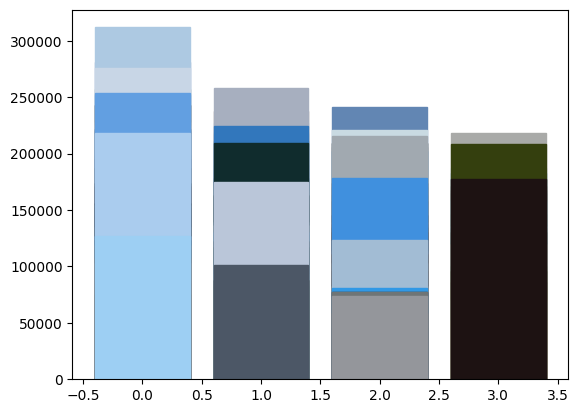

In [10]:
# Get color for all my images files
import json

def metadata_color_images():
    images = get_all_images()
    color_metadata = {}
    for image in images:
        try:
            color_metadata[image] = get_color(f"images/{image}")
            print(color_metadata)
        except Exception as e:
            continue
    with open("color_data.json","w") as file:
        json.dump(color_metadata, file, default=str, indent=4)
    return

metadata_color_images()

# III] Mise en place des tags sur les images #

In [11]:
# get tags for all images
import requests
import json
import os
from bs4 import BeautifulSoup

def get_tags(image_path):
    starturl = "https://commons.wikimedia.org/wiki/File:"
    filename = os.path.basename(image_path)
    url = starturl + filename
    response = requests.get(url)

    tags = []

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Trouver les balises de catégorie
        categories = soup.find_all('div', class_='mw-normal-catlinks')[0].find_all('a')

        for category in categories:
            if category.text == 'Categories' or 'Category' in category.text:
                continue
            tags.append(category.text)

    return tags

# Exemple d'utilisation
image_path = "images/MonroviaLB14.png"
tags = get_tags(image_path)
print("Catégories de l'image :", tags)  

Catégories de l'image : ['Monrovia', 'Montages of cities in Liberia']


In [12]:
# Get the tags of all images
import json

def get_all_images_tags():
    images = get_all_images()
    tags = {}
    for image in images:
        try:
            tags[image] = get_tags(f"images/{image}")
            print(image, " : ", tags[image])
        except Exception as e:
            continue
    with open("all_tags.json","w") as file:
        json.dump(tags, file, default=str, indent=4)
    return

get_all_images_tags()

00 0781 Canal in Delft (NL).jpg  :  ['Canals in Delft', 'Bridges in Delft (RM)', '2019 in Delft']
00 6191 Maastricht - Niederlande.jpg  :  ['East facade of Sint-Servaasbasiliek']
00 sea towers (April 2018).jpg  :  ['Sea Towers Gdynia']
01. Panorama de Lyon pris depuis le toit de la Basilique de Fourvière.jpg  :  ['Views of Lyon from Fourvière', 'Panoramic photographs of Lyon', "Photographs taken from the Basilique Notre-Dame de Fourvière's roof", 'Swiss Life', '2012 in Lyon']
138 - Place de la Bourse et le miroir d'eau - Bordeaux.jpg  :  ['Place de la Bourse (Bordeaux)', 'Visitor attractions in Gironde']
19-03-03-Maribor-RalfR-DJI 0444.jpg  :  ['Views of Maribor', 'Drava in Maribor', '2019 in Maribor', 'Center District, Maribor']
2010-02-19 3000x2000 chicago skyline.jpg  :  ['Chicago skyline in 2010', 'February 2010 in Chicago', 'Chicago skyline from Lake Michigan']
2017-05-27 Plac Zamkowy w Warszawie 1.jpg  :  ['Castle square in Warsaw', 'May 2017 in Warsaw']
Aerial view of Krasnoyars